### Nama: Nabila Putri Damayanti
### No. Peserta: PYTN-KS18-021
### Batch: 5

##### Install dan Import Library

In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import folium

##### Membaca Dataset

In [4]:
data = pd.read_csv('london_crime_by_lsoa.csv')

##### Explore dan Preprocessing Data

Membaca 5 data teratas

In [ ]:
data.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


Membaca 5 data terbawah

In [ ]:
data.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


Membaca header list

In [ ]:
data.columns

Index(['lsoa_code', 'borough', 'major_category', 'minor_category', 'value',
       'year', 'month'],
      dtype='object')

Membaca informasi setiap kolom

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


Melihat ukuran dataset

In [ ]:
data.shape

(13490604, 7)

Membaca statistik deskriptif dataset

In [ ]:
data.describe(include='O')

,lsoa_code,borough,major_category,minor_category
count,13490604,13490604,13490604,13490604
unique,4835,33,9,32
top,E01003689,Croydon,Theft and Handling,Common Assault
freq,3456,602100,3966300,522180


Memeriksa missing value

In [ ]:
data.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

Memerika duplicate data

In [ ]:
data.duplicated()

0           False
1           False
2           False
3           False
4           False
            ...  
13490599    False
13490600    False
13490601    False
13490602    False
13490603    False
Length: 13490604, dtype: bool

Melihat unique value pada setiap kolom

In [ ]:
print('borough: ', data['borough'].unique())
print('major_category: ', data['major_category'].unique())
print('minor_category: ', data['minor_category'].unique())
print('value: ', data['value'].unique())
print('year: ', data['year'].unique())
print('month: ', data['month'].unique())

borough:  ['Croydon' 'Greenwich' 'Bromley' 'Redbridge' 'Wandsworth' 'Ealing'
 'Hounslow' 'Newham' 'Sutton' 'Haringey' 'Lambeth' 'Richmond upon Thames'
 'Hillingdon' 'Havering' 'Barking and Dagenham' 'Kingston upon Thames'
 'Westminster' 'Hackney' 'Enfield' 'Harrow' 'Lewisham' 'Brent' 'Southwark'
 'Barnet' 'Waltham Forest' 'Camden' 'Bexley' 'Kensington and Chelsea'
 'Islington' 'Tower Hamlets' 'Hammersmith and Fulham' 'Merton'
 'City of London']
major_category:  ['Burglary' 'Violence Against the Person' 'Robbery' 'Theft and Handling'
 'Criminal Damage' 'Drugs' 'Fraud or Forgery' 'Other Notifiable Offences'
 'Sexual Offences']
minor_category:  ['Burglary in Other Buildings' 'Other violence' 'Personal Property'
 'Other Theft' 'Offensive Weapon' 'Criminal Damage To Other Building'
 'Theft/Taking of Pedal Cycle' 'Motor Vehicle Interference & Tampering'
 'Theft/Taking Of Motor Vehicle' 'Wounding/GBH' 'Other Theft Person'
 'Common Assault' 'Theft From Shops' 'Possession Of Drugs' 'Harassment'

##### Visualisasi Data

#### Line Plot

##### Pada rentang Januari 2008 - Desember 2016 di tahun berapa terjadi kejahatan kriminal dengan total tertinggi dan terendah?

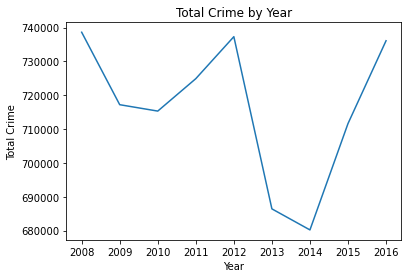

In [ ]:
# Membuat line plot dengan pengelompokkan data berdasarkan tahun dan total kasus pada setiap kelompok data
data.groupby('year')['value'].sum().plot(kind='line')

# Pemberian judul pada plot
plt.title('Total Crime by Year')

# Pelabelan pada sumbu x dan y
plt.xlabel('Year')
plt.ylabel('Total Crime')

# Show plot
plt.show()

##### Berdasarkan plot diatas dapat disimpulkan bahwa pada rentang Januari 2008 - Desember 2016 kejahatan kriminal tertinggi di London terjadi pada tahun 2008, sedangkan kejahatan terendah terjadi pada tahun 2014

#### Area Plot

##### Pada rentang Januari 2008 - Desember 2016 di tahun berapa terjadi kejahatan kriminal dengan total tertinggi dan terendah?

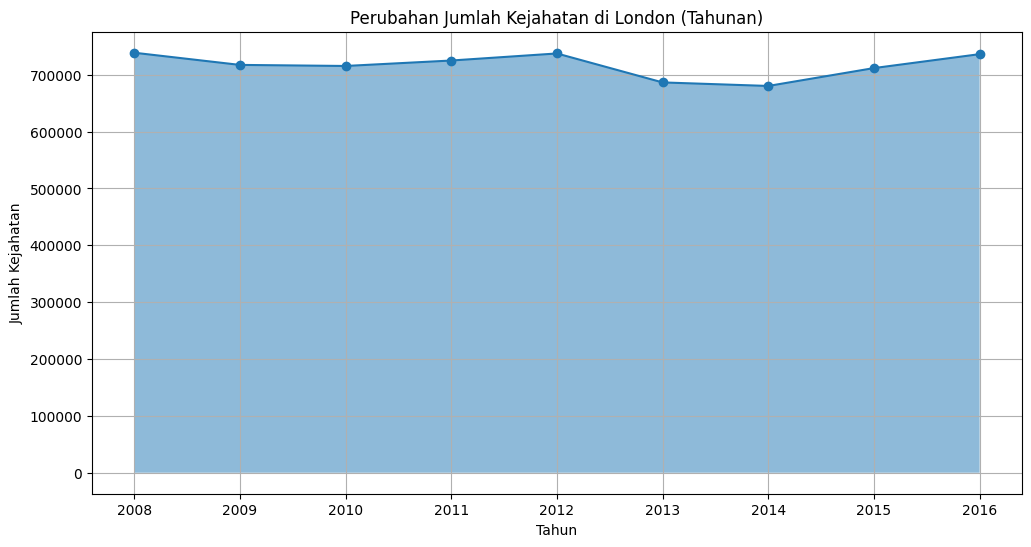

In [ ]:
# Mengelompokkan data kejahatan per tahun
crime_by_year = data.groupby(data['year'])['value'].sum()

# Membuat area plot
# Menentukan ukuran figure (12 inci x 6 inci)
plt.figure(figsize=(12, 6))
# Membuat area bayangan antara sumbu x dengan total value kejahatan per tahun serta nilai transparansi sebesar 0.5
plt.fill_between(crime_by_year.index, crime_by_year.values, alpha=0.5)
# Membuat plot garis dengan penanda bulat disetiap titik data dan garis (-) antar titik data
plt.plot(crime_by_year.index, crime_by_year.values, marker='o', linestyle='-')

# Pemberian judul pada plot
plt.title('Perubahan Jumlah Kejahatan di London (Tahunan)')

# Pelabelan pada sumbu x dan y
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kejahatan')

# Menambahkan garis grid
plt.grid(True)

# Show plot
plt.show()

##### Berdasarkan plot diatas dapat disimpulkan bahwa pada rentang Januari 2008 - Desember 2016 kejahatan kriminal tertinggi di London terjadi pada tahun 2008, sedangkan kejahatan terendah terjadi pada tahun 2014

#### Histogram

##### Pada rentang Januari 2008 - Desember 2016 wilayah mana yang memiliki total kejahatan kriminal tertinggi?

In [ ]:
ht1 = data[data['year'] <= 2013]
ht1

ht1 = ht1.pivot_table(index='borough', columns='year', values='value', aggfunc='sum')
ht1['Total'] = ht1.sum(axis=1)
ht1.sort_values(['Total'], ascending=False, axis=0, inplace=True)
ht1_top3 = ht1.drop('Total', axis=1, inplace=True)
ht1_top3 = ht1.head().transpose()
ht1_top3

borough,Westminster,Lambeth,Camden,Southwark,Croydon
year,,,,,
2008,47846,31717,32010,33470,29516
2009,48456,31225,31612,30623,29784
2010,48116,31671,31804,31320,29373
2011,54243,33224,33956,30723,29830
2012,59226,33473,31472,30737,30189
2013,53852,31868,28435,31128,27444


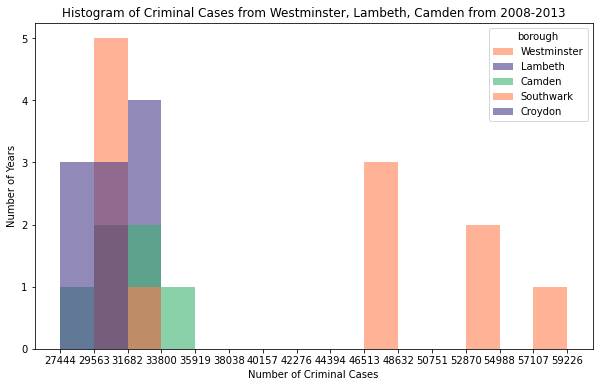

In [ ]:
# let's get the x-tick values
count, bin_edges = np.histogram(ht1_top3, 15)

# un-stacked histogram
ht1_top3.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Criminal Cases from Westminster, Lambeth, Camden from 2008-2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Criminal Cases')

plt.show()

##### Berdasarkan plot diatas dapat disimpulkan bahwa pada rentang Januari 2008 - Desember 2016 wilayah di London dengan total kejahatan kriminal tertinggi terjadi di Westminster

#### Bar Chart

##### Pada rentang Januari 2008 - Desember 2016 wilayah mana yang memiliki total kejahatan kriminal tertinggi dan terendah?

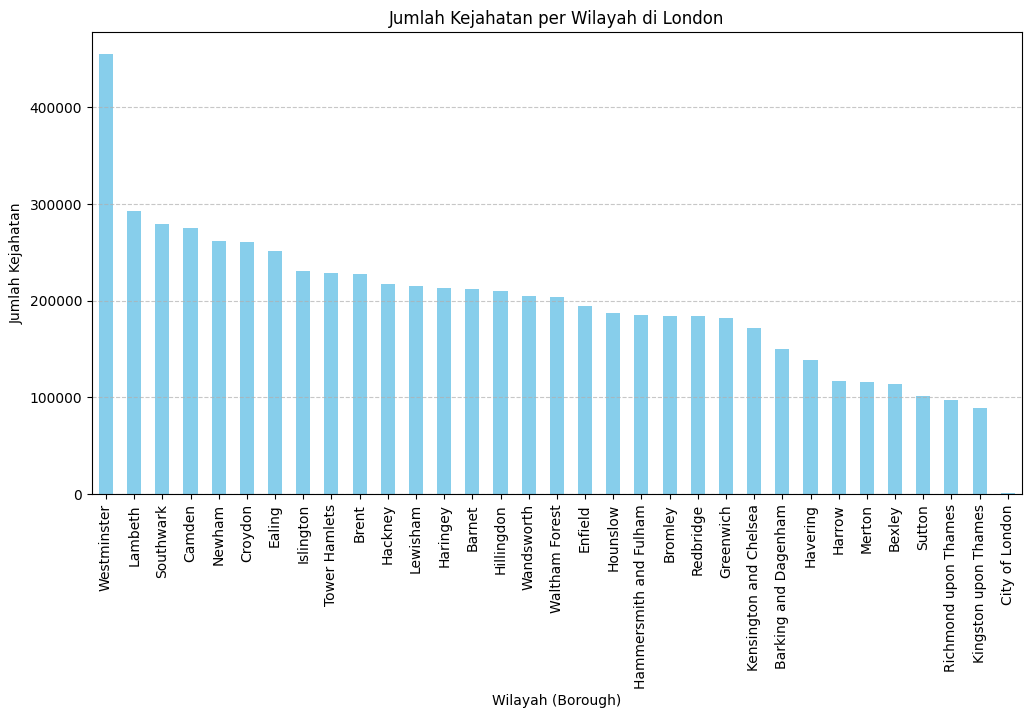

In [ ]:
# Menghitung jumlah kejahatan untuk setiap wilayah (borough)
borough_crime_counts = data.groupby('borough')['value'].sum().sort_values(ascending=False)

# Membuat bar chart
# Menentukan ukuran figure (12 inci x 6 inci)
plt.figure(figsize=(12, 6))
# Pewarnaan batang dengan warna biru langit
borough_crime_counts.plot(kind='bar', color='skyblue')

# Pemberian judul pada chart
plt.title('Jumlah Kejahatan per Wilayah di London')

# Pelabelan pada sumbu x dan y
plt.xlabel('Wilayah (Borough)')
plt.ylabel('Jumlah Kejahatan')

# Memutar sumbu x sebesar 90 derajat
plt.xticks(rotation=90)


plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show chart
plt.show()

##### Berdasarkan plot diatas dapat disimpulkan bahwa pada rentang Januari 2008 - Desember 2016 wilayah di London dengan total kejahatan kriminal tertinggi terjadi di Westminster dan terendah terjadi di City of London

#### Pie Chart

##### Pada rentang Januari 2008 - Desember 2016 di tahun berapa terjadi kejahatan kriminal dengan total tertinggi dan terendah?

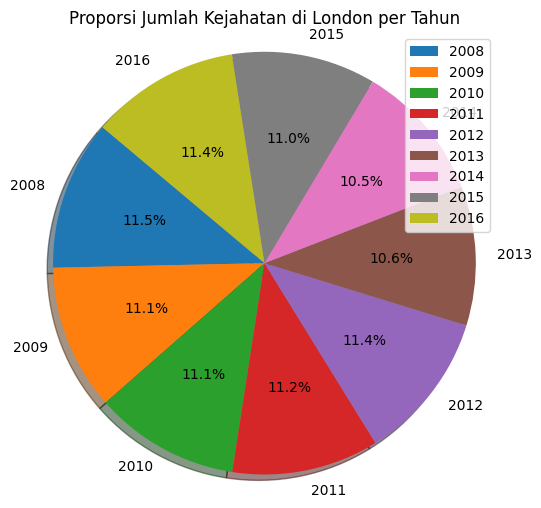

In [ ]:
# Mengelompokkan data kejahatan per tahun
crime_by_year = data.groupby('year')['value'].sum()

# Menentukan ukuran figure (6 inci x 6 inci)
plt.figure(figsize=(6, 6))

# Membuat pie chart dari data kejahatan per tahun
plt.pie(crime_by_year, labels=crime_by_year.index, autopct='%1.1f%%', startangle=140, shadow=True)

# Pemberian judul pada pie chart
plt.title('Proporsi Jumlah Kejahatan di London per Tahun')

# Menampilkan pie chart
plt.axis('equal')  # Untuk memastikan lingkaran berbentuk lingkaran

# Menambahkan legenda
plt.legend(labels=crime_by_year.index, loc='upper right')

# Show pie chart
plt.show()

##### Berdasarkan plot diatas dapat disimpulkan bahwa pada rentang Januari 2008 - Desember 2016 kejahatan kriminal tertinggi di London terjadi pada tahun 2008, sedangkan kejahatan terendah terjadi pada tahun 2014

#### Box Plot

##### Pada rentang Januari 2008 - Desember 2016 wilayah mana yang memiliki total kejahatan kriminal tertinggi dan terendah?

C:\Users\mrifa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mrifa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mrifa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

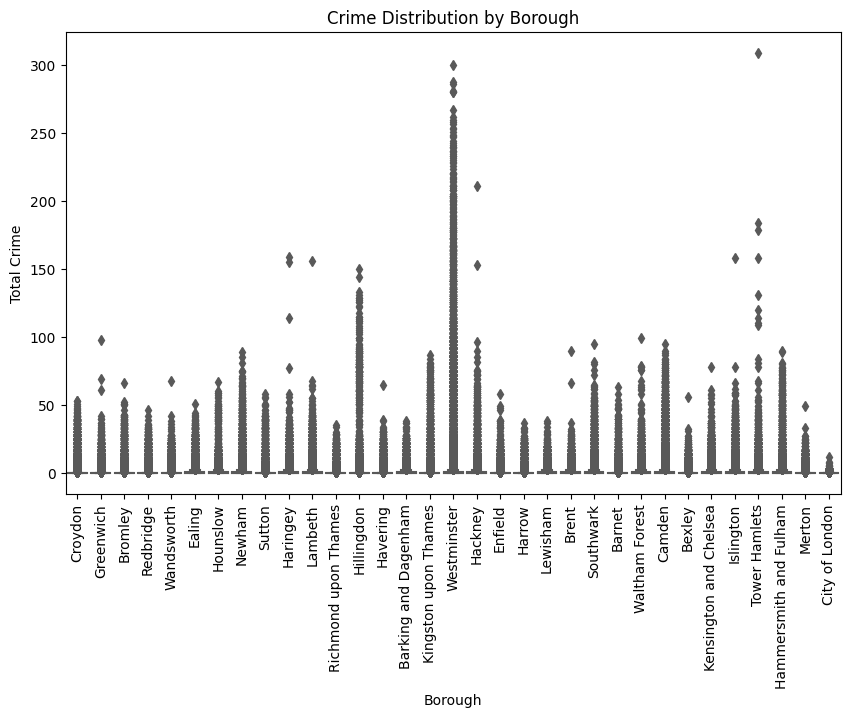

In [ ]:
# Menentukan ukuran figure (10 inci x 6 inci)
plt.figure(figsize=(10, 6))

# Pada boxplot sumbu x menggunakan kolom 'borough' dan sumbu y menggunakan kolom 'value', sedangkan palet warna yang digunakan adalah Set2
sns.boxplot(data=data, x='borough', y='value', palette='Set2')

# Pemberian judul pada plot
plt.title('Crime Distribution by Borough')

# Pelabelan pada sumbu x dan y
plt.xlabel('Borough')
plt.ylabel('Total Crime')

# Memutar sumbu x sebesar 90 derajat
plt.xticks(rotation=90)

# Show plot
plt.show()

##### Berdasarkan plot diatas dapat disimpulkan bahwa pada rentang Januari 2008 - Desember 2016 wilayah di London dengan total kejahatan kriminal tertinggi terjadi di Westminster dan terendah terjadi di City of London

### Scatter Plot

##### Pada rentang Januari 2008 - Desember 2016 di tahun berapa terjadi kejahatan kriminal dengan total tertinggi dan terendah?

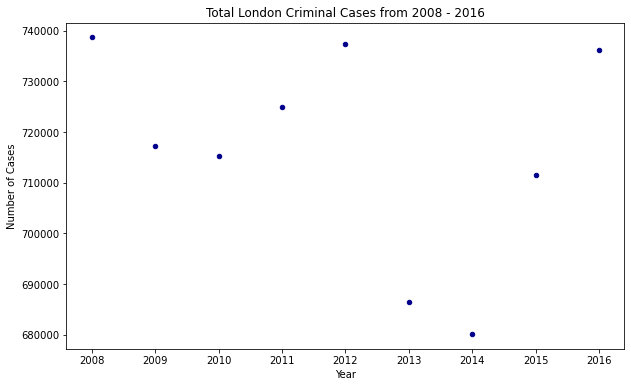

In [ ]:
sp1 = data.pivot_table(index='year', columns='borough', values='value', aggfunc=sum)
sp1['Total'] = sp1.sum(axis=1)
sp11 = sp1[['Total']]
sp11.reset_index(inplace=True)
sp11

# Pembuatan plot
sp11.plot(kind='scatter', x='year', y='Total', figsize=(10, 6), color='darkblue')

# Pemberian judul pada plot
plt.title('Total London Criminal Cases from 2008 - 2016')

# Pelabelan sumbu x dan y
plt.xlabel('Year')
plt.ylabel('Number of Cases')

plt.show()

##### Berdasarkan plot diatas dapat disimpulkan bahwa pada rentang Januari 2008 - Desember 2016 kejahatan kriminal tertinggi di London terjadi pada tahun 2008, sedangkan kejahatan terendah terjadi pada tahun 2014

### Word Clouds

##### Berdasarkan dataset yang ada, wilayah mana di London yang terjadi tindak kejahatan kriminal

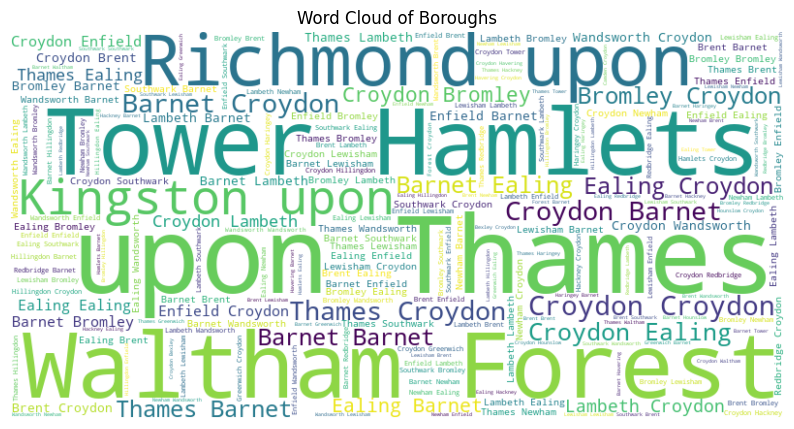

In [5]:
# Membuat string teks yang berisi semua wilayah (borough) di London dengan dipisahkan oleh spasi
wordcloud_text = ' '.join(data['borough'])

# Membuat word cloud dengan lebar 800 pixel, tinggi 400 pixel, dan latar belakang putih
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)

# Menentukan ukuran figure (10 inci x 6 inci)
plt.figure(figsize=(10, 6))

# Menampilkan word cloud menggunakan interpolasi bilinear
plt.imshow(wordcloud, interpolation='bilinear')

# Pemberian judul pada word cloud
plt.title('Word Cloud of Boroughs')

# Menyembunyikan sumbu x dan y pada word cloud
plt.axis('off')

# Show word cloud
plt.show()

##### Berdasarkan visualisasi di atas, dapat disimpulkan bahwa wilayah yang memiliki ukuran besar merupakan wilayah yang memiliki tindak kejahatan kriminal terbesar

#### Folium Maps

##### Bagaimana peta letak geografis London

In [ ]:
# Membuat peta dengan zoom start 12
london_map = folium.Map(location=[51.5074, -0.1278], zoom_start=12)

# Menampilkan peta
london_map

##### Berdasarkan visualisasi di atas, dapat dilihat peta letak geografis London

#### Overall Analysis

##### Berdasarkan visualisasi yang dilakukan, dapat disimpulkan bahwa pada rentang Januari 2008 - Desember 2016 kejahatan kriminal tertinggi di London terjadi pada tahun 2008, sedangkan kejahatan terendah terjadi pada tahun 2014. Kemudian, pada rentang Januari 2008 - Desember 2016 wilayah di London dengan total kejahatan kriminal tertinggi terjadi di Westminster dan terendah terjadi di City of London